In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# ML공부

In [2]:
from pj_ds_functions import y_lable_encoding
df = sns.load_dataset('iris')
#df.head()
df = df.query("species != 'virginica'")

y = df['species']
X = df.drop(columns='species', axis=1)
y = y_lable_encoding(y)
print(y)
X

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


## 학습/테스트 데이터 세트 분리

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)


## 정규화, 표준화
학습/데스트 데이버 세트로 분리하기전에 먼저 전체 데이터 세트에 스케일링을 적용한뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직합니다.

### 정규화
* 정규화 정의: 데이터의 스케일을 특정 범위, 보통 0과 1 사이로 조정하는 과정입니다.
* 목적: 서로 다른 스케일을 가진 데이터 특성들을 동일한 범위로 조정하여, 모델 학습의 일관성과 안정성을 높이기 위함입니다.
* 중요성: 모든 데이터 포인트가 동일한 스케일을 갖도록 하여, 특정 특성이 모델 학습에 지나치게 큰 영향을 미치는 것을 방지합니다.
* 적용 분야: 신경망, 거리 기반 알고리즘(예: k-최근접 이웃) 등 스케일의 영향을 받는 다양한 머신러닝 알고리즘에 적용됩니다.
* 결과: 데이터의 최소값이 0, 최대값이 1이 되며, 모든 특성 값들이 이 범위 내로 조정되어 모델의 훈련이 용이해집니다.

In [4]:
from sklearn.preprocessing import MinMaxScaler

mmScaler = MinMaxScaler()
mmScaler = mmScaler.fit(X_train)
mmScaler = mmScaler.transform(X_train)
#mmScaler

### 표준화

* 표준화 정의: 데이터에서 각 값에서 평균을 빼고, 그 결과를 표준편차로 나누는 과정입니다.
* 목적: 데이터의 특성들이 다른 스케일을 가질 때, 이를 표준 정규 분포(평균 0, 표준편차 1)에 근사하도록 변환하여 모델의 학습 효율성을 높이고 성능을 개선하기 위함입니다.
* 중요성: 서로 다른 단위 또는 스케일을 가진 데이터를 비교, 분석하기 용이하게 만들고, 여러 머신러닝 알고리즘에서 더 나은 성능을 얻기 위해 필수적입니다.
* 적용 분야: 대부분의 머신러닝 알고리즘, 특히 거리 기반 알고리즘(예: k-최근접 이웃, SVM) 및 선형 모델(예: 선형 회귀, 로지스틱 회귀)에 유용합니다.
* 결과: 데이터의 모든 특성이 동일한 스케일을 갖게 되어, 모델 학습이 더욱 효과적이고 공정한 비교가 가능해집니다.

In [5]:
from sklearn.preprocessing import StandardScaler

SScaler = StandardScaler()
SScaler = SScaler.fit(X_train)
SScaler = SScaler.transform(X_train)
#SScaler

## 평가
* Accuracy
* Precision
* Recall
* F1-score(trade-off) -> Threshold

In [6]:
#모델 준비
from sklearn.tree import DecisionTreeClassifier

ds_model = DecisionTreeClassifier()
ds_model = ds_model.fit(X_train, y_train)
yhat = ds_model.predict(X_test)
yhat_proba = ds_model.predict_proba(X_test)

### Accuracy

In [7]:
from sklearn.metrics import accuracy_score
print(y_test)
print(yhat)
accuracy_score(y_test, yhat)

[0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1]
[0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1]


1.0

### Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[11,  0],
       [ 0,  9]], dtype=int64)

### F1-Score

In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(y_test)
print(yhat)
f1_score = f1_score(y_test, yhat)
pre_score = precision_score(y_test, yhat)
rec_score = recall_score(y_test, yhat)

print("precision score: ", pre_score)
print("recall score: ", rec_score)
print("F1 Score: ", f1_score)

[0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1]
[0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1]
precision score:  1.0
recall score:  1.0
F1 Score:  1.0


### ROC_AUC Graph

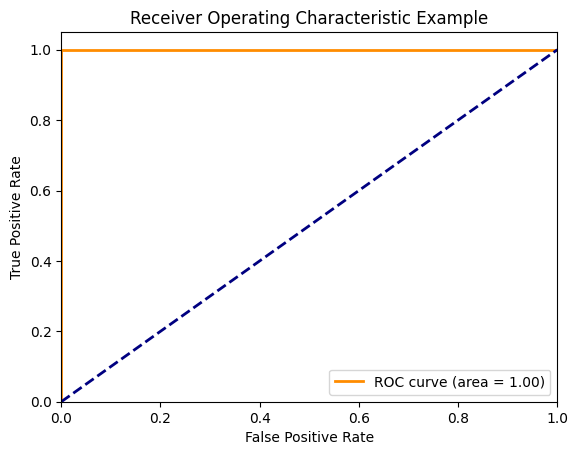

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_score = yhat_proba[:,[1]]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

## Cross validation

### Stratified K-fold


In [11]:
#모델 준비
from sklearn.model_selection import cross_val_score, cross_validate
for i in range(2,11):
    cross_score = cross_val_score(ds_model, X_train, y_train,scoring='f1',cv=i)
    print(f'CV={i} 교차 검증 f1: {np.mean(cross_score)}')



CV=2 교차 검증 f1: 1.0
CV=3 교차 검증 f1: 1.0
CV=4 교차 검증 f1: 1.0
CV=5 교차 검증 f1: 1.0
CV=6 교차 검증 f1: 1.0
CV=7 교차 검증 f1: 1.0
CV=8 교차 검증 f1: 1.0
CV=9 교차 검증 f1: 1.0
CV=10 교차 검증 f1: 1.0


### GridSearchCV

In [12]:
import pydataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

iris = pydataset.data('iris')
iris.head()

X = iris.iloc[:,:-1]
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#print('X학습 행 갯수: ',X_train.shape[0])
#print('X테스트 행 갯수: ',X_test.shape[0])
#print('y학습 행 갯수: ',y_train.shape[0])
#print('y테스트 행 갯수: ',y_test.shape[0])

#모델 설정, 그리드 서치를 위한 dt 모델 파라미터 설정
dt = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

# 그리드서치 설정
grid_dt = GridSearchCV(dt, param_grid=parameters, cv=3,refit=True, n_jobs=-1) 
#refit: 가장 좋은 파라미터 설정으로 재학습시킴, n_jobs: 병열으로 실행(3이면 3가지일을 동시에 함, cpu의 논리 프로세서가 max 값임, -1은 코어 전부 다씀)

grid_dt.fit(X_train, y_train) #학습

print(grid_dt.best_params_) #최고의 파라미터 확인

print(grid_dt.best_score_) #최고의 정확도 확인

#최고의 파라미터로 훈련된 모델 객채가 저장되어있음, **fit할 필요없음**
print(grid_dt.best_estimator_) #최고의 파라미터가 저장된 모델의 객체

dt_best = grid_dt.best_estimator_
yhat = dt_best.predict(X_test)
yhat

y_test == yhat

print((y_test == yhat).value_counts()) #실제값과 예측값 확인
print(dt_best.feature_importances_) # 피쳐의 중요도 확인
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat) #테스트 값의 정확도 확인

{'max_depth': 2, 'min_samples_split': 2}
0.9250000000000002
DecisionTreeClassifier(max_depth=2)
Species
True     28
False     2
Name: count, dtype: int64
[0. 0. 1. 0.]


0.9333333333333333

# Hyperopt

In [13]:
#!pip install hyperopt

In [14]:
from hyperopt import hp

In [15]:
#입력값의 검색 공간을 제공하는 대표적 함수
#-10~10까지 1간격을 가지는 입력 변수 x와 -15_15까지 1간격으로 입력 변수 y 설정
search_space = {'x': hp.quniform('x',-10,10,1), 'y': hp.quniform('y', -15,15,1)}
search_space

{'x': <hyperopt.pyll.base.Apply at 0x1ee7b9a6770>,
 'y': <hyperopt.pyll.base.Apply at 0x1ee7b9a5630>}

In [16]:
#위와 같은 방법을 numpy로 구현해본것
import numpy as np
np.linspace(-10,10,100)
np.arange(-10,10,1)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [17]:
from hyperopt import STATUS_OK
#목적 함수를 생성. 변수값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    return retval

In [18]:
from hyperopt import fmin, tpe, Trials
#입력 결과값을 저장한 Trials 객체값 생성
trial_val = Trials()

#목적 함수의 최솟값을 반환하는 최적 입력 변수값을 5번의 입력값 시도(max_evals=5)로 찾아냄
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
              trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)


100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [19]:
trial_val = Trials()
#max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
              trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best_02:', best_02)


100%|██████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1109.38trial/s, best loss: -296.0]
best_02: {'x': 2.0, 'y': 15.0}


### Hyperopt 실습

In [20]:
from sklearn.datasets import load_breast_cancer

In [21]:
def breast_cancer():
    cancer = load_breast_cancer()
    X = cancer['data']
    y = cancer['target']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = breast_cancer()

(455, 30)
(455,)
(114, 30)
(114,)


In [23]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)


In [24]:
from hyperopt import hp
#찾을 범위 설정
#max_depth는 5에서 1 사이까지 간격으로, min_child_weight는 1에서 2 까지 1 간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   } 


In [25]:
from sklearn.model_selection import cross_val_score

#fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임
#XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야함
#정확도는 높을수록 더 좋은 수치임. -1* 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    #수행 시간 절약을 위해 n_estimator=100으러 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                                min_child_weight=int(search_space['min_child_weight']),
                                learning_rate=search_space['learning_rate'],
                                colsample_bytree=search_space['colsample_bytree'],
                                eval_metric='logloss')
    accuracy = np.mean(cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3))
    #
    return -1*accuracy

In [26]:
#from hyperopt import fmin, tpe, Trials
#입력 결과값을 저장한 Trials 객체값 생성
#trial_val = Trials()

#목적 함수의 최솟값을 반환하는 최적 입력 변수값을 5번의 입력값 시도(max_evals=5)로 찾아냄
#best = fmin(fn=objective_func, space=xgb_search_space, algo=tpe.suggest, max_evals=50,
#              trials=trial_val, rstate=np.random.default_rng(seed=9))

#print('best:', best)

# 결정나무 Decision Tree

In [27]:
import pydataset
dia =pydataset.data('diamonds')
dia = dia.sample(frac=.1)
dia.columns

X = dia[['depth', 'table', 'price', 'x', 'y','z']]
y = dia[['cut']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1, random_state=1234)

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
yhat = dt_clf.predict(X_test)

accuracy_score(y_test, yhat)

0.6592592592592592

### 교차검증을 통하여 정확도를 높여봅시다.

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X, y, scoring='accuracy', cv=3)
print('cross_val for each: ', scores)
print('mean_cross_val', np.mean(scores))

cross_val for each:  [0.6429366  0.6407119  0.66295884]
mean_cross_val 0.6488691138301818


### GridSearchCV로 정확도 높이기

In [29]:
from sklearn.model_selection import GridSearchCV
grid_param = {'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24], 'min_samples_split':[2,3,4,5,6,7,8,9,10]}
grid_dt2 = GridSearchCV(dt_clf, param_grid=grid_param, cv=10, refit=True, n_jobs=-1)
grid_dt2.fit(X_train, y_train)


grid_dt2.best_params_

grid_dt2.best_score_
print(grid_dt2.best_estimator_)
best_esti = grid_dt2.best_estimator_

yhat = best_esti.predict(X_test)
yhat

accuracy_score(y_test, yhat)

DecisionTreeClassifier(max_depth=6, min_samples_split=7)


0.7092592592592593

# 앙상블 학습 

## RandomForstClassifier + GridSearchCV사용

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
grid_param2 = {'n_estimators': [10,50,100],'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24], 'min_samples_split':[2,4,6,8,10,12,14,16,18,20]}
grid_dt3 = GridSearchCV(rf_clf, param_grid=grid_param2, cv=5, refit=True, n_jobs=-1)
grid_dt3.fit(X_train, y_train)

grid_dt3.best_params_

grid_dt3.best_score_
print(grid_dt3.best_estimator_)
best_esti = grid_dt3.best_estimator_

yhat = best_esti.predict(X_test)
yhat

accuracy_score(y_test, yhat)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=22, min_samples_split=6, n_estimators=50)


0.7185185185185186

In [31]:
best_esti.feature_importances_

array([0.25065472, 0.30812448, 0.11480294, 0.11846255, 0.10888206,
       0.09907325])

## XGboost

In [32]:
from xgboost import XGBClassifier 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1, random_state=1234)

xgb = XGBClassifier(n_estimators=40, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb.fit(X_train, y_train)
yhat = xgb.predict(X_test)
accuracy_score(y_test, yhat)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.7018518518518518

## LightGBM

In [33]:
#!pip install LightGBM

In [34]:
from lightgbm import LGBMClassifier
lgmb = LGBMClassifier(n_estimators=5, learning_rate=0.05, max_depth=3, eval_metric='logloss')
lgmb.fit(X_train, y_train)
yhat = lgmb.predict(X_test)
accuracy_score(y_test, yhat)

[LightGBM] [Warning] Unknown parameter: eval_metric


0.6166666666666667

# 실습

## 1. 예시 타이타닉 데이터
1. 필요한 칼럼을 뽑아낸다 (X,y)
2. 결측치를 처리한다
3. 이상치를 처리한다
4. 스케일링한다
5. 적용한 모델을 선택한다 -> fit -> predict -> 평가
6. 5번을 파라미터를 바꾸어가면서 반복한다.

## 2. 예시 Iris + Decision Tree + graphviz

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [36]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [37]:
iris = load_iris()

In [38]:
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4 , stratify=y, random_state=11)


In [39]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=1, min_samples_split=2, max_depth=2)
dt_clf = dt_clf.fit(X_train,y_train)

yhat = dt_clf.predict(X_test)
accuracy_score(y_test, yhat)

0.9666666666666667

In [40]:
yhat

array([0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2])

In [41]:
y_test

array([0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2])

In [42]:
#!pip install graphviz

In [43]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris['target_names'], \
               feature_names=iris['feature_names'], impurity=True, filled=True)

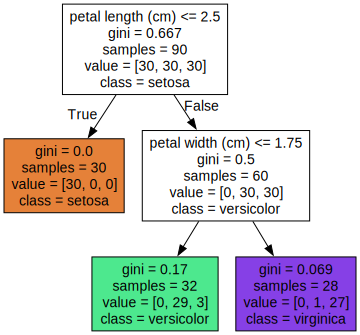

In [44]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [45]:
dt_clf.feature_importances_

array([0.        , 0.        , 0.56997455, 0.43002545])

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [47]:
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)

In [48]:
x_df = pd.DataFrame(X_train, columns=iris['feature_names'])
x_df['target'] = y_train
x_df1 = x_df.sort_values(by='petal length (cm)')
x_df1.head(50)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
116,4.3,3.0,1.1,0.1,0
17,5.0,3.2,1.2,0.2,0
83,5.8,4.0,1.2,0.2,0
25,4.4,3.2,1.3,0.2,0
58,4.4,3.0,1.3,0.2,0
8,5.5,3.5,1.3,0.2,0
78,5.0,3.5,1.3,0.3,0
0,5.1,3.5,1.4,0.2,0
45,5.5,4.2,1.4,0.2,0
51,4.6,3.2,1.4,0.2,0


In [49]:
x_df1 = x_df1.reset_index(drop=True)
x_df1.head(50)
x_df1 = x_df1.sort_values(by='sepal width (cm)')
x_df1.head(50)
# x_df1 = x_df1.iloc[:, ]
# x_df1
# a = x_df1.sort_values(by='petal width (cm)')
# a

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
45,5.0,2.0,3.5,1.0,1
69,6.2,2.2,4.5,1.5,1
64,6.3,2.3,4.4,1.3,1
51,5.5,2.3,4.0,1.3,1
43,5.0,2.3,3.3,1.0,1
42,4.9,2.4,3.3,1.0,1
48,5.5,2.4,3.8,1.1,1
47,5.5,2.4,3.7,1.0,1
86,6.3,2.5,5.0,1.9,2
67,4.9,2.5,4.5,1.7,2


In [50]:
#a.head(50)

# 복습

## 데이터 셋트 종류 보기

In [51]:
## 시본에서의 데이터셋트
#import seaborn as sns 
#sns.get_dataset_names()
#df = sns.load_dataset('titanic')


## sklearn에서의 데이터 셋트
#from sklearn.datasets import load_****

##!pip install pydataset #파이데이터 셋트
#import pydataset
#pydataset.data()
#pydataset.data('iris')

In [52]:
import pydataset
pydataset.data('diamonds')

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Human activity

In [53]:
X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', header=None)
column_names = [str(i) for i in range(X_test.shape[1])]

X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=column_names )
X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=column_names)
y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+', header=None, names=['action'])
y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+', header=None, names=['action']) 

### XGBoost

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [55]:
xgb = XGBClassifier(random_state=1234)

In [56]:
y_train = y_train -1
y_train

xgb.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [57]:
pred = xgb.predict(X_test)
pred

array([4, 4, 4, ..., 1, 1, 1], dtype=int64)

In [58]:
y_test= y_test -1 

In [59]:
y_test.values == pred

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [60]:
y_test_temp = y_test.values.flatten()

In [61]:
#accuracy
sum(y_test_temp == pred) / len(pred)

0.9392602646759416

#### 조기중단 적용

In [62]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

In [63]:
xgb =XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)

In [64]:
evals = [(X_tr, y_tr),(X_val, y_val)]
xgb.fit(X_tr,y_tr, early_stopping_rounds=50, eval_metric='mlogloss', eval_set=evals, verbose=True)


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.67484	validation_1-mlogloss:1.67577
[1]	validation_0-mlogloss:1.57260	validation_1-mlogloss:1.57439
[2]	validation_0-mlogloss:1.48203	validation_1-mlogloss:1.48488
[3]	validation_0-mlogloss:1.40142	validation_1-mlogloss:1.40550
[4]	validation_0-mlogloss:1.32503	validation_1-mlogloss:1.32996
[5]	validation_0-mlogloss:1.25514	validation_1-mlogloss:1.26069
[6]	validation_0-mlogloss:1.19150	validation_1-mlogloss:1.19781
[7]	validation_0-mlogloss:1.13320	validation_1-mlogloss:1.14019
[8]	validation_0-mlogloss:1.07998	validation_1-mlogloss:1.08724
[9]	validation_0-mlogloss:1.02976	validation_1-mlogloss:1.03721
[10]	validation_0-mlogloss:0.98273	validation_1-mlogloss:0.99029
[11]	validation_0-mlogloss:0.93904	validation_1-mlogloss:0.94693
[12]	validation_0-mlogloss:0.89796	validation_1-mlogloss:0.90665
[13]	validation_0-mlogloss:0.85940	validation_1-mlogloss:0.86896
[14]	validation_0-mlogloss:0.82301	validation_1-mlogloss:0.83311
[15]	validation_0-mlogloss:0.78912	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
pred = xgb.predict(X_test)
pred

array([4, 4, 4, ..., 1, 1, 1], dtype=int64)

In [66]:
accuracy_score(y_test, pred)

0.9457074991516796

#### feature importance 그래프

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

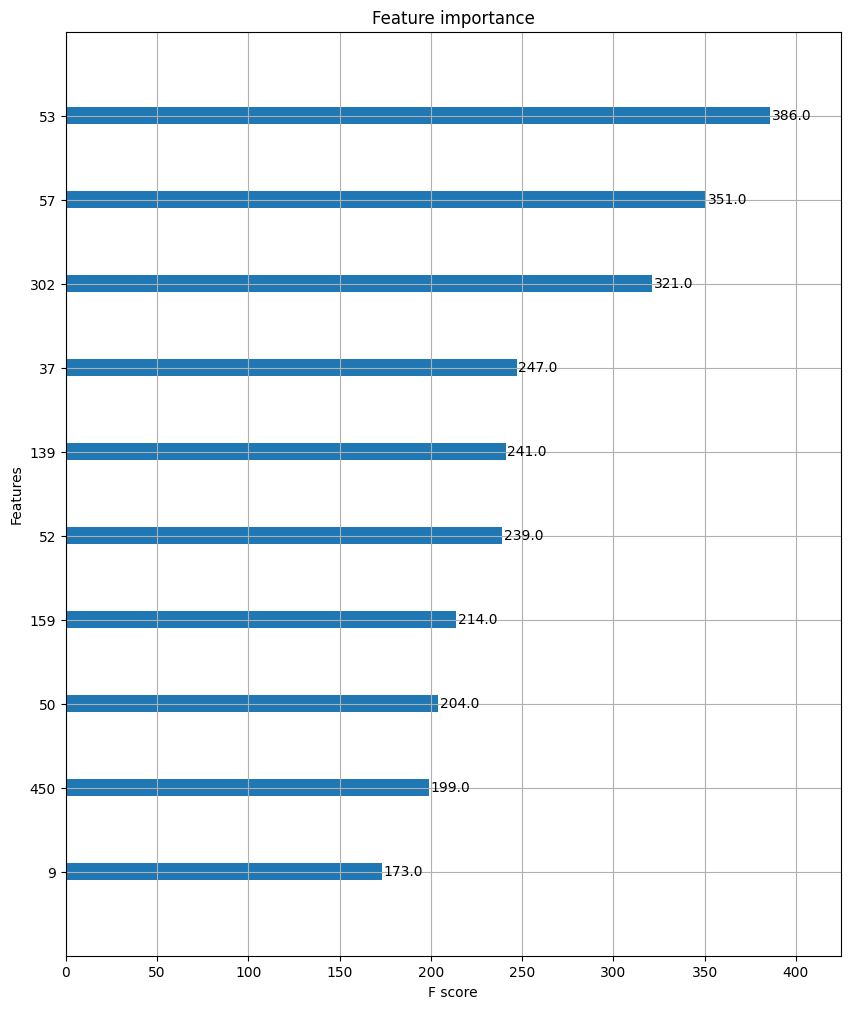

In [67]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb, ax=ax, max_num_features=10)

### LightGBM

In [68]:
#!pip install lightgbm==3.3.5

In [69]:
import numpy as np
import pandas as pd

from lightgbm import LGBMClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', header=None)
column_names = [str(i) for i in range(X_test.shape[1])]

X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=column_names )
X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=column_names)
y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+', header=None, names=['action'])
y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+', header=None, names=['action'])

y_test = y_test['action'] - 1
y_train = y_train['action'] -1

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.05, random_state=42)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

preds =lgbm.predict(X_test) 

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's multi_logloss: 1.55918	valid_1's multi_logloss: 1.57407
[2]	training's multi_logloss: 1.38412	valid_1's multi_logloss: 1.40892
[3]	training's multi_logloss: 1.24019	valid_1's multi_logloss: 1.27428
[4]	training's multi_logloss: 1.11809	valid_1's multi_logloss: 1.15708
[5]	training's multi_logloss: 1.01212	valid_1's multi_logloss: 1.05473
[6]	training's multi_logloss: 0.919102	valid_1's multi_logloss: 0.965531
[7]	training's multi_logloss: 0.836745	valid_1's multi_logloss: 0.886189
[8]	training's multi_logloss: 0.763752	valid_1's multi_logloss: 0.816363
[9]	training's multi_logloss: 0.698336	valid_1's multi_logloss: 0.754014
[10]	training's multi_logloss: 0.63963	valid_1's multi_logloss: 0.698009
[11]	training's multi_logloss: 0.586809	valid_1's multi_logloss: 0.646942
[12]	training's multi_logloss: 0.538873	valid_1's multi_logloss: 0.600083
[13]	training's multi_logloss: 0.49545	valid_1's multi_logloss: 0.558486
[14]	training's multi_logloss: 0.456029	valid_1's multi_log

# 산탄데르 고객 만족 예측

## Hyperopt 실습

In [70]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [71]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [72]:
y= cust_df['TARGET']
y.value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

In [73]:
# Target값의 불균형이 심하다.
print(y.value_counts()/len(y))

TARGET
0    0.960431
1    0.039569
Name: count, dtype: float64


In [74]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

In [75]:
y = cust_df.iloc[:,-1:]
y.head()

,TARGET
0,0
1,0
2,0
3,0
4,0


In [76]:
X = cust_df.iloc[:,:-1]
X.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

### XGBClassifier 모델 학습과 하이퍼 파라미터 튜닝

In [78]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 100으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 10으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])


[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.83783	validation_1-auc:0.81126
[2]	validation_0-auc:0.83892	validation_1-auc:0.81192
[3]	validation_0-auc:0.84090	validation_1-auc:0.81349
[4]	validation_0-auc:0.84187	validation_1-auc:0.81356
[5]	validation_0-auc:0.84355	validation_1-auc:0.81422
[6]	validation_0-auc:0.84534	validation_1-auc:0.81550
[7]	validation_0-auc:0.84658	validation_1-auc:0.81623
[8]	validation_0-auc:0.84727	validation_1-auc:0.81669
[9]	validation_0-auc:0.84794	validation_1-auc:0.81668
[10]	validation_0-auc:0.84980	validation_1-auc:0.81828
[11]	validation_0-auc:0.85105	validation_1-auc:0.81965
[12]	validation_0-auc:0.85217	validation_1-auc:0.81999
[13]	validation_0-auc:0.85301	validation_1-auc:0.82049
[14]	validation_0-auc:0.85558	validation_1-auc:0.82210
[15]	validation_0-auc:0.85662	validation_1-auc:0.82288
[16]	validation_0-auc:0.85811	validation_1-auc:0.82380
[17]	validation_0-auc:0.85864	validation_1-auc:0.82365
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=156, ...)

In [79]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8383


### Hyperopt 적용해서 하이퍼 파라미터 튜닝

In [80]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'n_estimators': hp.quniform('n_estimators', 20, 60, 10),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 5, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                    'learning_rate': hp.quniform('learning_rate', 0.1, 0.2, 0.05)
}

In [81]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=int(search_space['n_estimators']), 
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'],
                            eval_metric='auc'
                           )

    xgb_clf.fit(X_tr,y_tr)
    
    auc_accuracy = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
    return -1*auc_accuracy
        

In [82]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, 
            rstate=np.random.default_rng(seed=0))

print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [00:56<00:00,  1.14s/trial, best loss: -0.8476621076539018]
best: {'colsample_bytree': 0.6777376334513477, 'learning_rate': 0.1, 'max_depth': 6.0, 'min_child_weight': 2.0, 'n_estimators': 60.0}


In [83]:


xgb_clf = XGBClassifier(n_estimators=60, 
                        max_depth=6,
                        min_child_weight=2,
                        colsample_bytree=0.6777376334513477,
                        learning_rate=0.1,
                        eval_matric='auc'
                       )

xgb_clf.fit(X_tr,y_tr)

auc_accuracy = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
auc_accuracy

0.8476621076539018